In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#載入資料載入資料
df = pd.read_csv('/content/drive/MyDrive/1112DL作業/Titanic_assignment_data_7.csv')
#df = pd.read_csv('/content/drive/MyDrive/1112DL_課堂/Titanic_demo_1.csv')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,35.0,0,0,8.0500,S,no
1,1,female,53.0,0,0,27.4458,C,yes
2,3,male,31.0,0,0,7.9250,S,yes
3,1,female,31.0,0,0,134.5000,C,no
4,2,male,36.0,0,0,12.8750,C,no
...,...,...,...,...,...,...,...,...
1042,3,male,NaN,0,0,7.8958,S,no
1043,2,female,4.0,2,1,39.0000,S,yes
1044,3,male,NaN,0,0,7.2500,S,no
1045,3,male,29.0,0,0,9.4833,S,no


# **資料前處理**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   object 
 2   Age       796 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1047 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 65.6+ KB


In [5]:
df[['Pclass']] = df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   object 
 1   Sex       1047 non-null   object 
 2   Age       796 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1047 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 65.6+ KB


In [6]:
df.describe().round(2)

,Age,SibSp,Parch,Fare
count,796.00,1047.00,1047.00,1047.00
mean,30.04,0.50,0.40,34.10
std,14.25,1.02,0.91,53.97
min,1.00,0.00,0.00,0.00
25%,21.00,0.00,0.00,7.90
50%,28.00,0.00,0.00,14.50
75%,39.00,1.00,0.00,31.33
max,80.00,8.00,9.00,512.33


In [7]:
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1047,1047,796.000000,1047.000000,1047.000000,1047.000000,1047,1047
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,572,674,NaN,NaN,NaN,NaN,720,646
mean,NaN,NaN,30.042714,0.498567,0.403056,34.103732,NaN,NaN
std,NaN,NaN,14.249376,1.019761,0.907748,53.971786,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.500000,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,31.331250,NaN,NaN


In [8]:
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         572
1         258
2         217
dtype: int64
+-----------------------+
Sex   
male      674
female    373
dtype: int64
+-----------------------+
Embarked
S           720
C           227
Q           100
dtype: int64
+-----------------------+
Survived
no          646
yes         401
dtype: int64


In [9]:
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,35.0,0,0,8.0500,S,no
1,1,female,53.0,0,0,27.4458,C,yes
2,3,male,31.0,0,0,7.9250,S,yes
3,1,female,31.0,0,0,134.5000,C,no
4,2,male,36.0,0,0,12.8750,C,no
...,...,...,...,...,...,...,...,...
1040,1,female,31.0,0,2,164.8667,S,yes
1041,2,male,28.0,0,1,33.0000,S,no
1043,2,female,4.0,2,1,39.0000,S,yes
1045,3,male,29.0,0,0,9.4833,S,no


In [10]:
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         371
1         224
2         201
dtype: int64
+-----------------------+
Sex   
male      489
female    307
dtype: int64
+-----------------------+
Embarked
S           592
C           166
Q            38
dtype: int64
+-----------------------+
Survived
no          468
yes         328
dtype: int64


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    796 non-null    object 
 1   Sex       796 non-null    object 
 2   Age       796 non-null    float64
 3   SibSp     796 non-null    int64  
 4   Parch     796 non-null    int64  
 5   Fare      796 non-null    float64
 6   Embarked  796 non-null    object 
 7   Survived  796 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 56.0+ KB


In [12]:
new_df.describe().round(2)

,Age,SibSp,Parch,Fare
count,796.00,796.00,796.00,796.00
mean,30.04,0.51,0.44,38.50
std,14.25,0.87,0.88,58.88
min,1.00,0.00,0.00,0.00
25%,21.00,0.00,0.00,8.26
50%,28.00,0.00,0.00,16.10
75%,39.00,1.00,1.00,39.00
max,80.00,5.00,6.00,512.33


In [13]:
new_df.to_csv('Titanic_homework_nonNA_07.csv',index=False, header=True)

# **Dummies**

In [14]:
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived'])
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0
1,53.0,0,0,27.4458,1,0,0,1,0,1,0,0,0,1
2,31.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1
3,31.0,0,0,134.5000,1,0,0,1,0,1,0,0,1,0
4,36.0,0,0,12.8750,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,31.0,0,2,164.8667,1,0,0,1,0,0,0,1,0,1
1041,28.0,0,1,33.0000,0,1,0,0,1,0,0,1,1,0
1043,4.0,2,1,39.0000,0,1,0,1,0,0,0,1,0,1
1045,29.0,0,0,9.4833,0,0,1,0,1,0,0,1,1,0


In [15]:
dummied_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 0 to 1046
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           796 non-null    float64
 1   SibSp         796 non-null    int64  
 2   Parch         796 non-null    int64  
 3   Fare          796 non-null    float64
 4   Pclass_1      796 non-null    uint8  
 5   Pclass_2      796 non-null    uint8  
 6   Pclass_3      796 non-null    uint8  
 7   Sex_female    796 non-null    uint8  
 8   Sex_male      796 non-null    uint8  
 9   Embarked_C    796 non-null    uint8  
 10  Embarked_Q    796 non-null    uint8  
 11  Embarked_S    796 non-null    uint8  
 12  Survived_no   796 non-null    uint8  
 13  Survived_yes  796 non-null    uint8  
dtypes: float64(2), int64(2), uint8(10)
memory usage: 38.9 KB


In [16]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head().round(4)

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.4304,0.0,0.0,0.0157,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.6582,0.0,0.0,0.0536,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.3797,0.0,0.0,0.0155,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.3797,0.0,0.0,0.2625,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.4430,0.0,0.0,0.0251,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [17]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           796 non-null    float64
 1   SibsSp        796 non-null    float64
 2   Parch         796 non-null    float64
 3   Fare          796 non-null    float64
 4   Pclass_1      796 non-null    float64
 5   Pclass_2      796 non-null    float64
 6   Pclass_3      796 non-null    float64
 7   Sex_female    796 non-null    float64
 8   Sex_male      796 non-null    float64
 9   Embarked_C    796 non-null    float64
 10  Embarked_Q    796 non-null    float64
 11  Embarked_S    796 non-null    float64
 12  Survived_no   796 non-null    float64
 13  Survived_yes  796 non-null    float64
dtypes: float64(14)
memory usage: 87.2 KB


# **設定目標**

In [18]:
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

y=scaled_data['Survived_yes'].copy()
y=y.astype(int)
#y

# **切割訓練集與測試集**

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [20]:
from collections import Counter
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 373, 1: 263})
------------------------------------
y_test : Counter({0: 95, 1: 65})


In [21]:
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 12


# **Creating Net**

In [22]:
for learning_rate in [0.03, 0.06]:
  for momentum in [0.2, 0.4, 0.6]:
    clear.clear_session()
    model=Sequential()
    model.add(Dense(units=24, input_dim=12, activation='relu'))
    model.add(Dense(units=48, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    opt=SGD(learning_rate=learning_rate,momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    print("----------------learning_rate:", learning_rate)
    print("----------------momentum:", momentum)
    for seed in [10, 20, 30]:
      print("-------------------seed:", seed)
      x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=seed)
      history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))
      print("----------------------------------------")


----------------learning_rate: 0.03
----------------momentum: 0.2
-------------------seed: 10
Epoch 1/100
8/8 [==============================] - 4s 53ms/step - loss: 0.7015 - accuracy: 0.4843 - val_loss: 0.6907 - val_accuracy: 0.5078
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6758 - accuracy: 0.5866 - val_loss: 0.6712 - val_accuracy: 0.6016
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6577 - accuracy: 0.6870 - val_loss: 0.6570 - val_accuracy: 0.6719
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6442 - accuracy: 0.6890 - val_loss: 0.6454 - val_accuracy: 0.6641
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6331 - accuracy: 0.6929 - val_loss: 0.6353 - val_accuracy: 0.6719
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6230 - accuracy: 0.6949 - val_loss: 0.6259 - val_accuracy: 0.6641
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - 

In [23]:
for momentum in [0.2, 0.4, 0.6]:
  clear.clear_session()
  model=Sequential()
  model.add(Dense(units=24, input_dim=12, activation='relu'))
  model.add(Dense(units=48, activation='relu'))
  model.add(Dense(units=1, activation='sigmoid'))

  opt=SGD(learning_rate=0.09, momentum=momentum)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  print("----------------learning_rate:0.09")
  print("----------------momentum:", momentum)
  for seed in [10, 20, 30]:
    print("-------------------seed:", seed)
    x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=seed)
    history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))
    print("----------------------------------------")

----------------learning_rate:0.09
----------------momentum: 0.2
-------------------seed: 10
Epoch 1/100
8/8 [==============================] - 1s 55ms/step - loss: 0.6813 - accuracy: 0.5591 - val_loss: 0.6632 - val_accuracy: 0.6562
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6461 - accuracy: 0.6634 - val_loss: 0.6421 - val_accuracy: 0.6719
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6242 - accuracy: 0.7028 - val_loss: 0.6251 - val_accuracy: 0.6797
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6059 - accuracy: 0.6969 - val_loss: 0.6078 - val_accuracy: 0.6641
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5891 - accuracy: 0.7205 - val_loss: 0.5903 - val_accuracy: 0.7266
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.5725 - accuracy: 0.7480 - val_loss: 0.5744 - val_accuracy: 0.7422
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - l

In [31]:
clear.clear_session()
model=Sequential()
model.add(Dense(units=24, input_dim=12, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

opt=SGD(learning_rate=0.09, momentum=0.6)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print("----------------learning_rate:0.09")
print("----------------momentum:0.6")

print("-------------------seed:30")
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=30)
history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))
print("----------------------------------------")

----------------learning_rate:0.09
----------------momentum:0.6
-------------------seed:30
Epoch 1/100
8/8 [==============================] - 1s 39ms/step - loss: 0.6670 - accuracy: 0.6004 - val_loss: 0.6776 - val_accuracy: 0.5859
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6087 - accuracy: 0.6654 - val_loss: 0.6379 - val_accuracy: 0.6641
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5698 - accuracy: 0.7638 - val_loss: 0.6119 - val_accuracy: 0.7109
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5462 - accuracy: 0.7756 - val_loss: 0.5929 - val_accuracy: 0.7188
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5311 - accuracy: 0.7657 - val_loss: 0.5864 - val_accuracy: 0.7188
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5227 - accuracy: 0.7657 - val_loss: 0.5818 - val_accuracy: 0.7188
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5

In [26]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

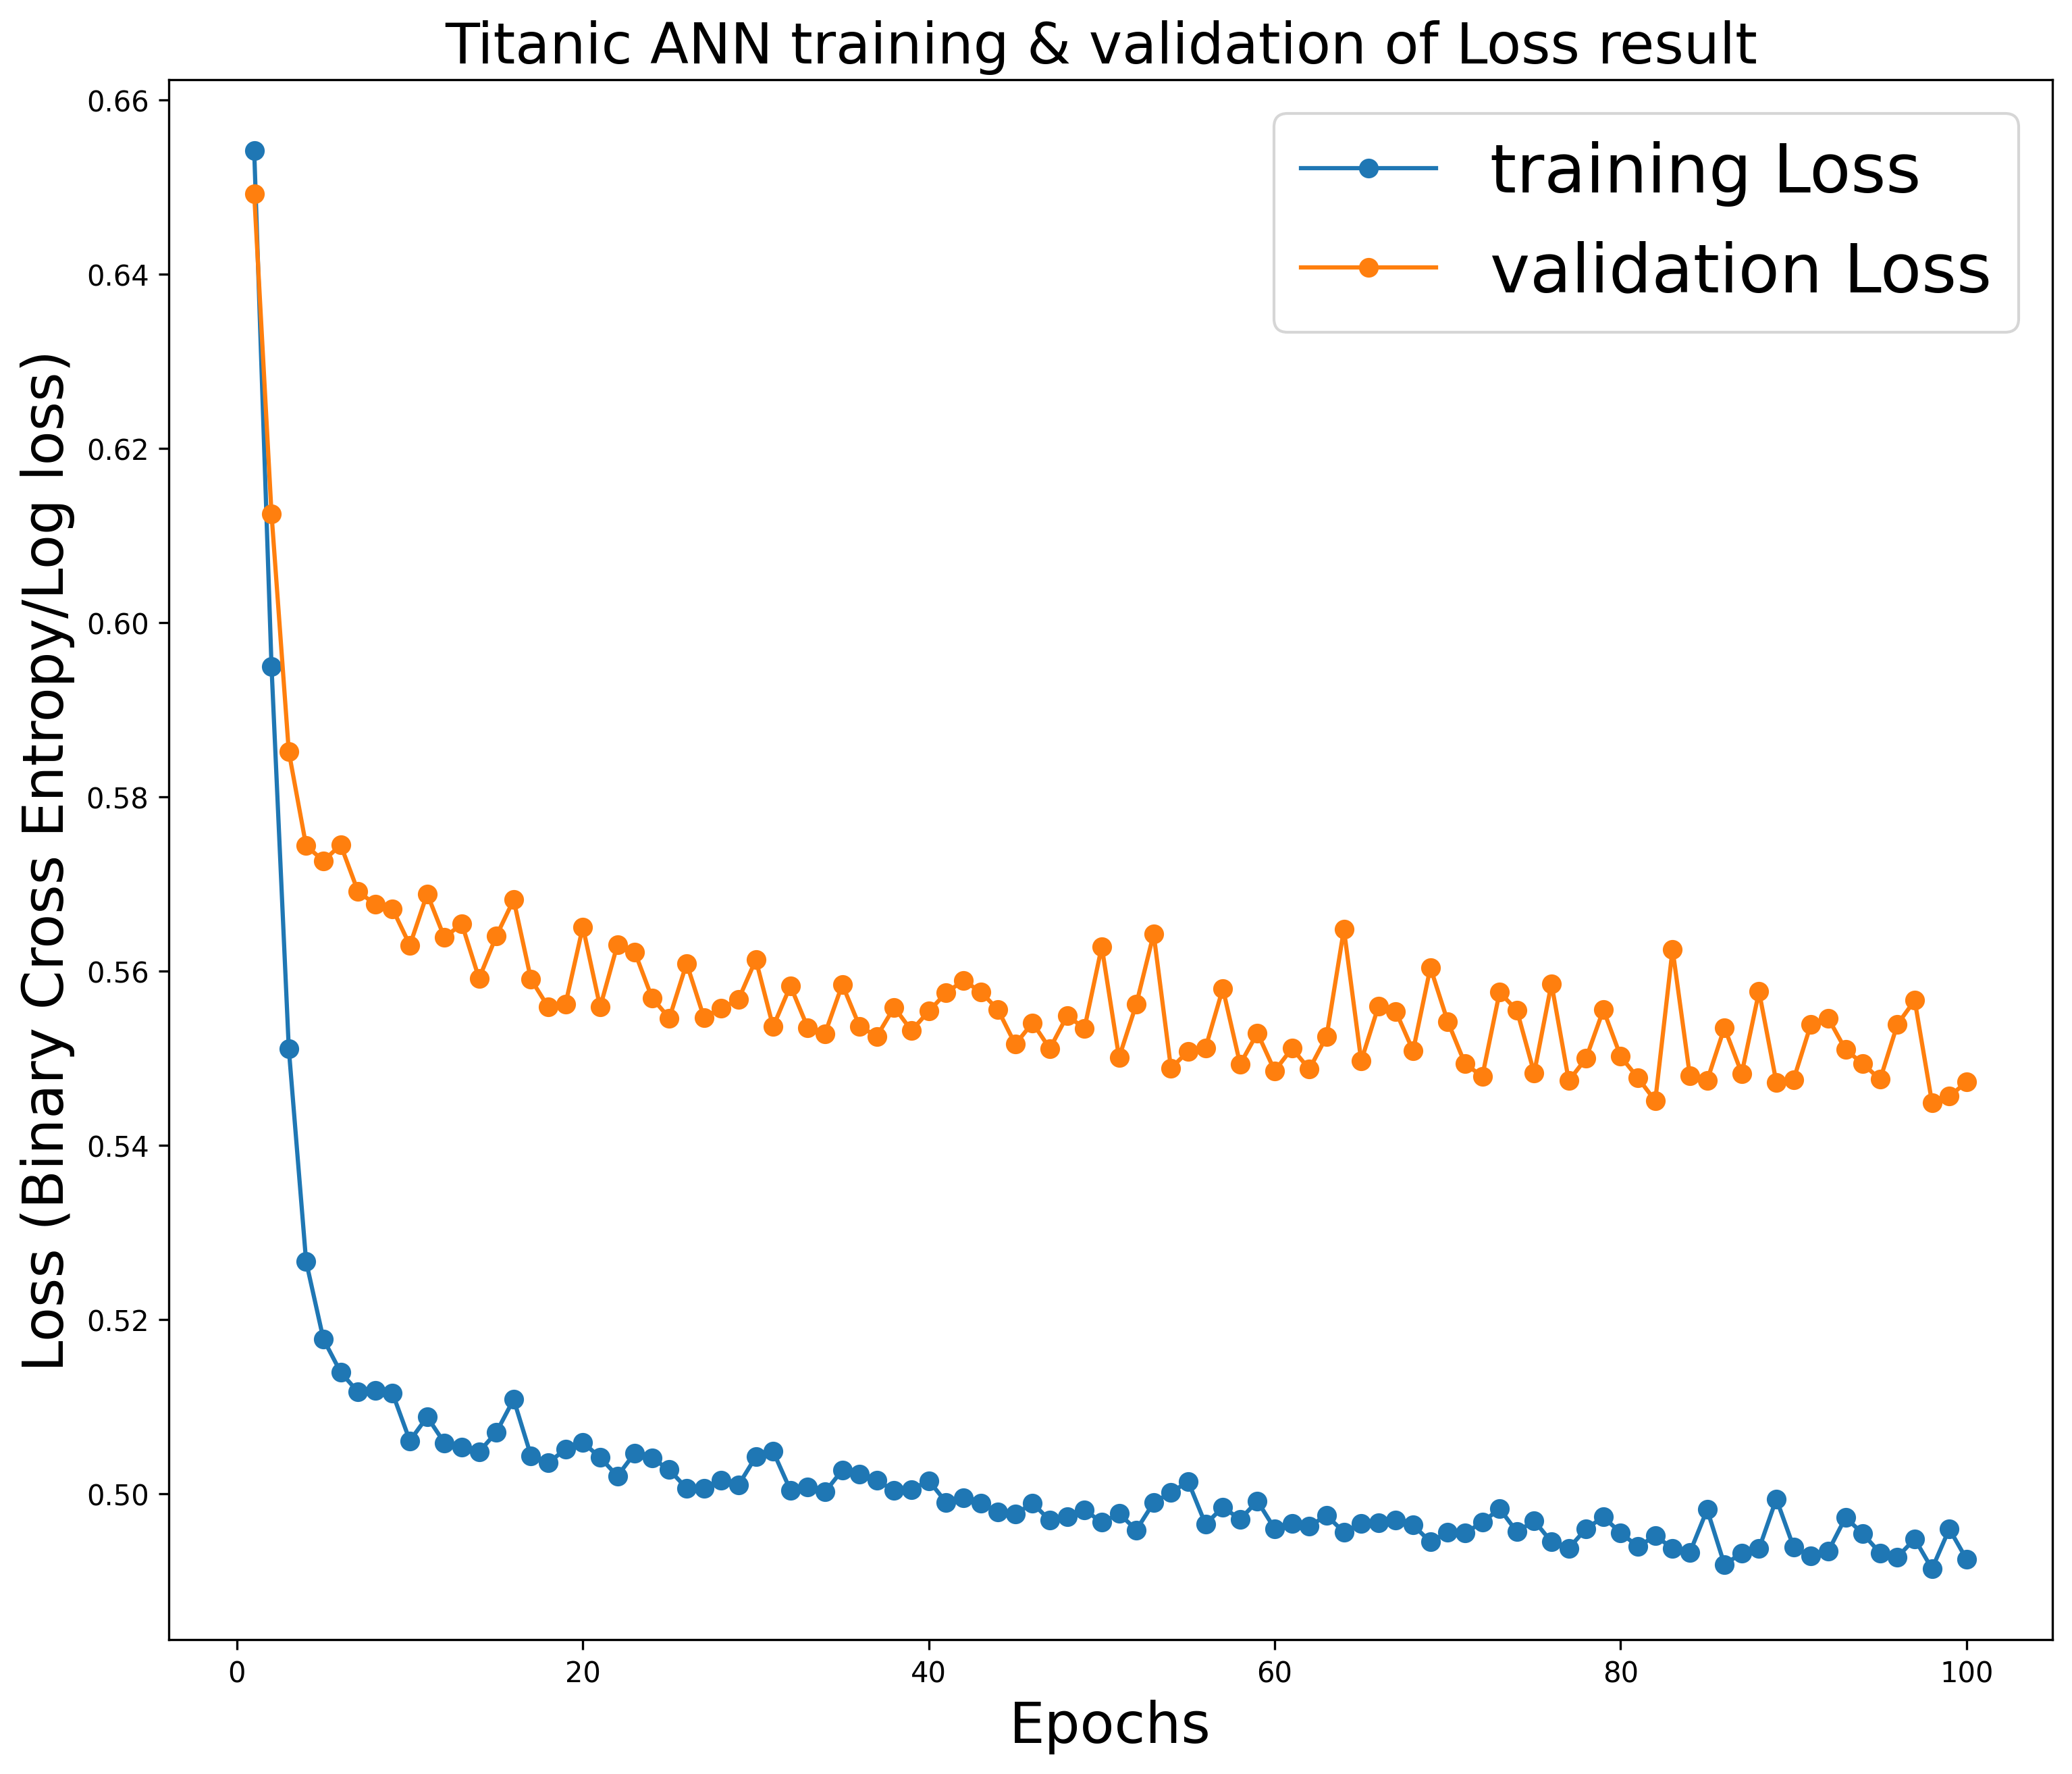

In [27]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('Titanic ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

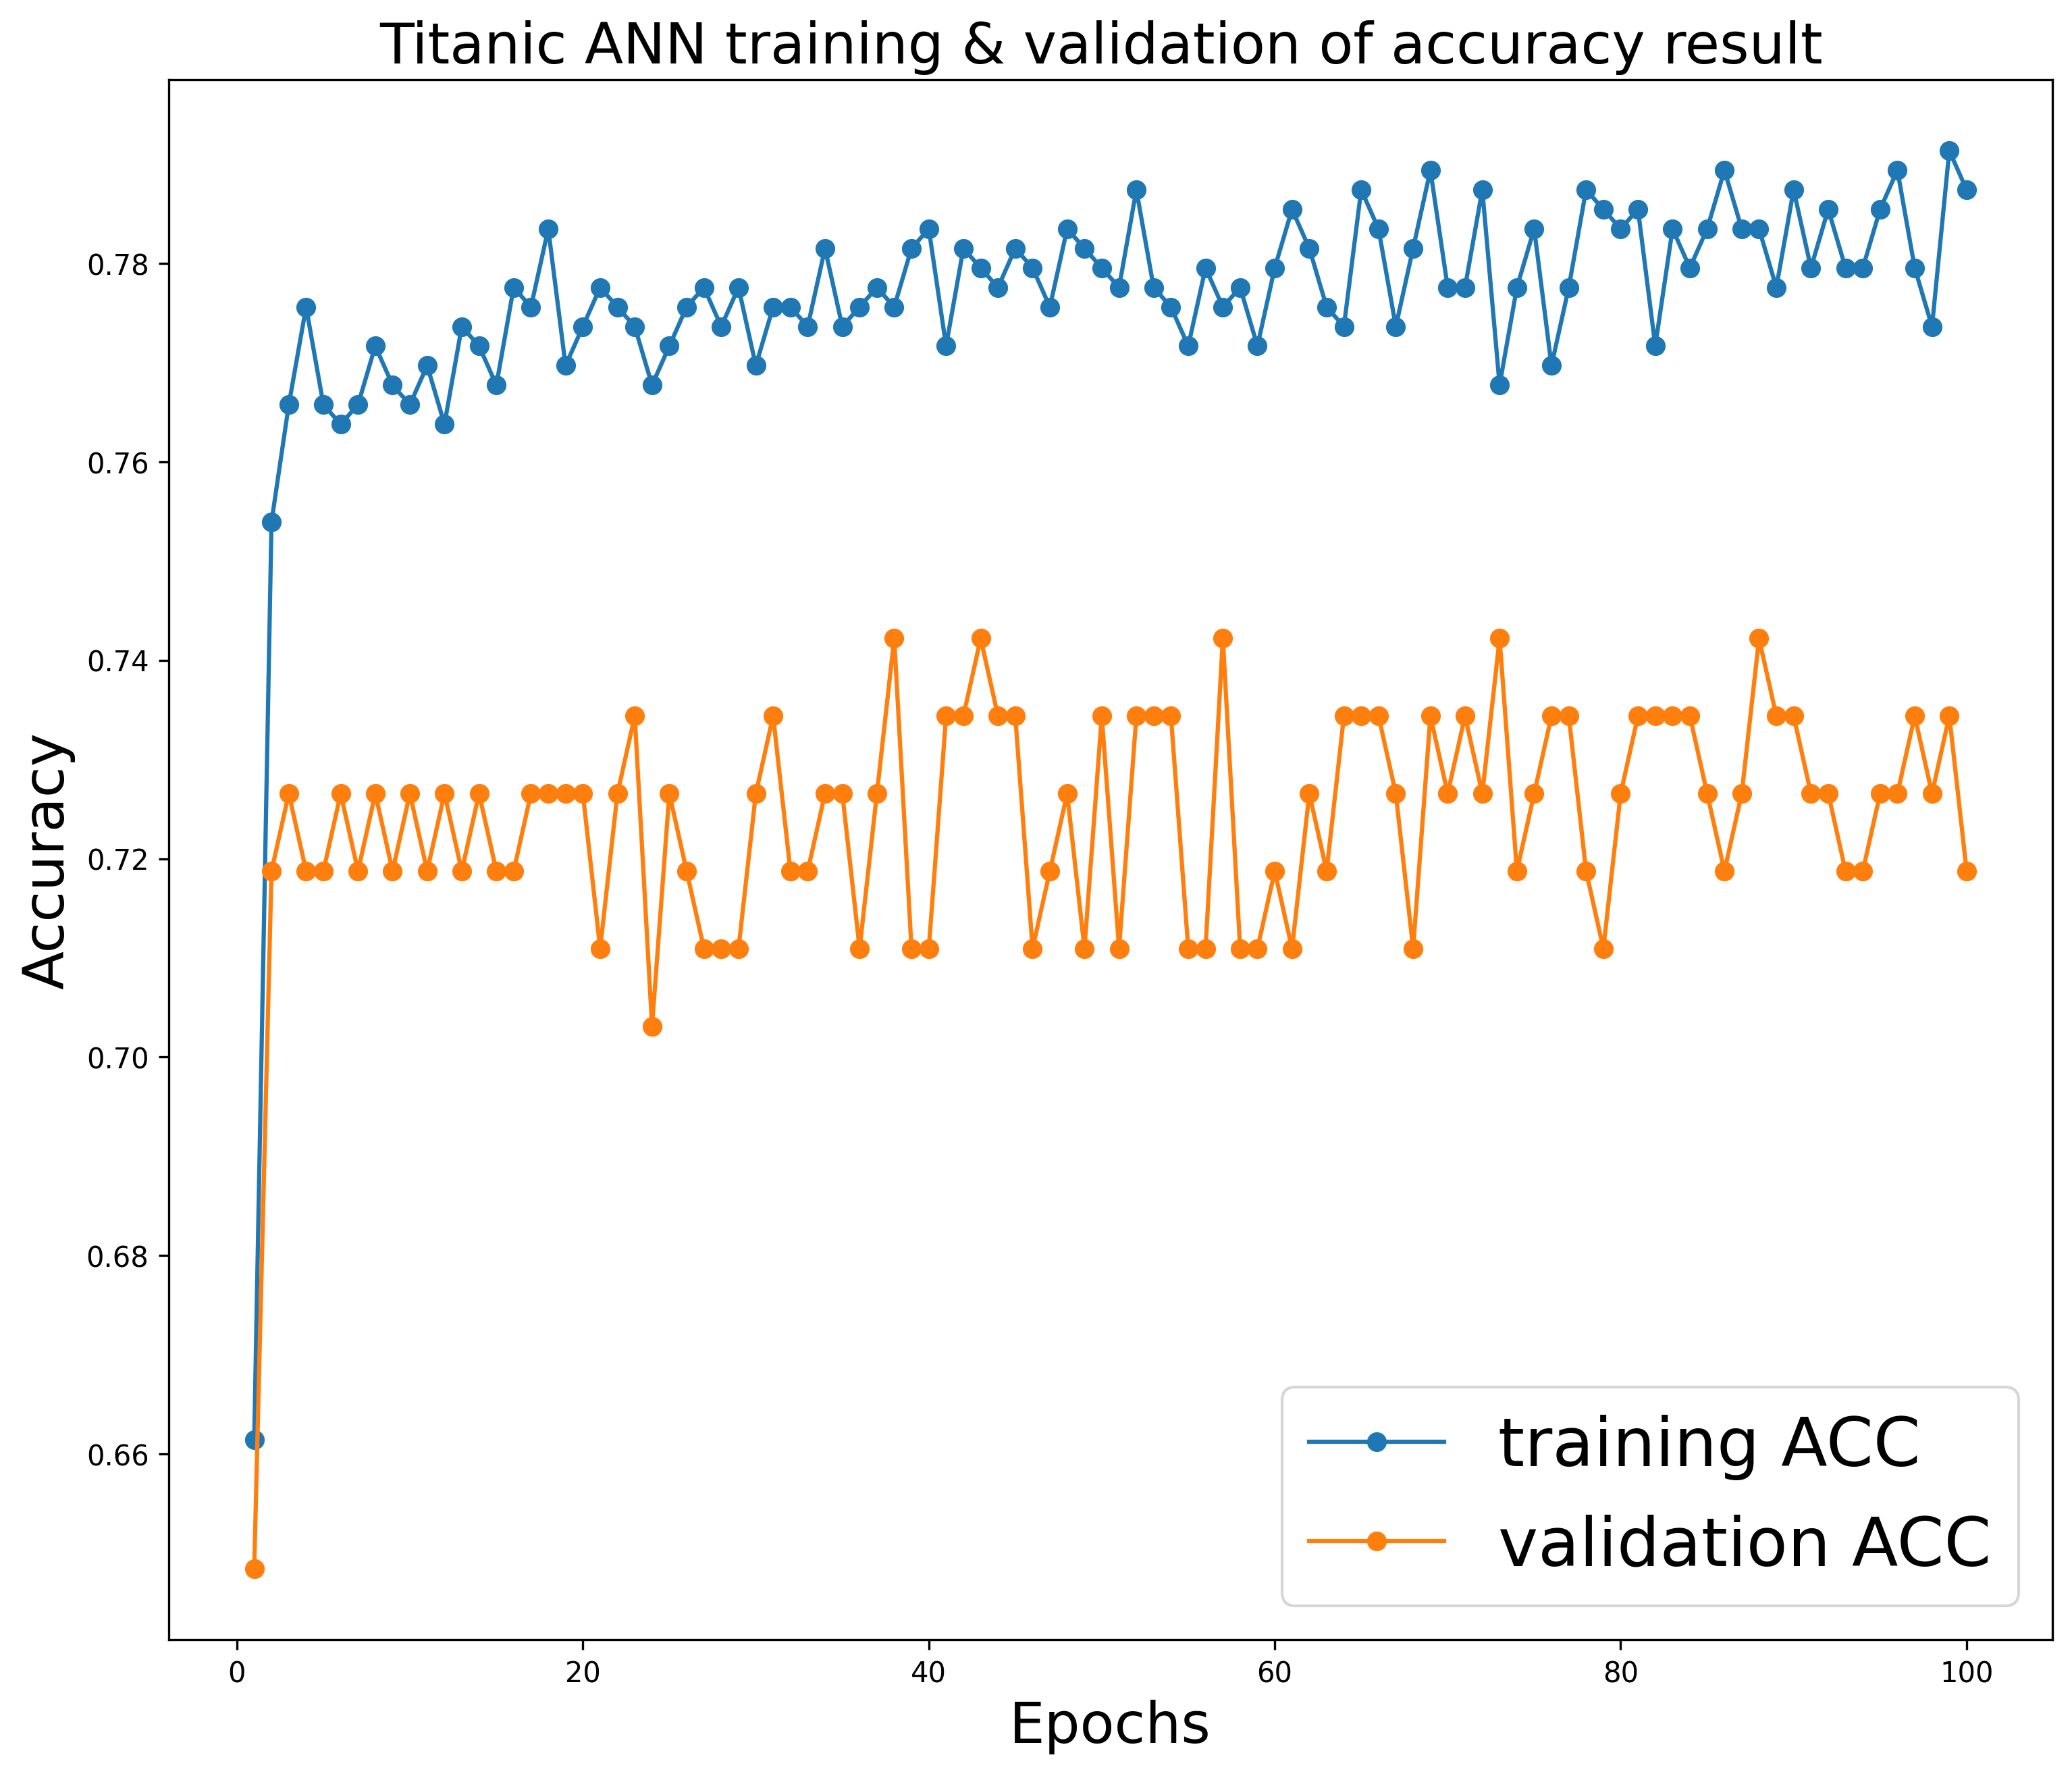

In [28]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

# ***最終結果***

In [30]:
print("----------------learing_rate:0.09")
print("----------------momentum:0.6")
clear.clear_session()
ANN_model=Sequential()
ANN_model.add(Dense(units=24, input_dim=12, activation='relu'))
ANN_model.add(Dense(units=48, activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid'))

opt=SGD(learning_rate=0.09,momentum=0.6)
ANN_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history=ANN_model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1)

----------------learing_rate:0.09
----------------momentum:0.6
Epoch 1/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.6063
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.6181
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5822 - accuracy: 0.7303
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7520
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5324 - accuracy: 0.7657
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7618
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5168 - accuracy: 0.7657
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7638
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.7657
Epoch 10/100
8/8 [==============================] - 0s 3ms/step 

In [32]:
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[0.26772043],
       [0.87511516],
       [0.1812108 ],
       [0.20016979],
       [0.88624185],
       [0.3866048 ],
       [0.49291384],
       [0.20462339],
       [0.20957696],
       [0.14888734],
       [0.8943688 ],
       [0.8937629 ],
       [0.69574946],
       [0.7970195 ],
       [0.82558143],
       [0.7792948 ],
       [0.16791293],
       [0.16995318],
       [0.20654353],
       [0.26347655],
       [0.2628947 ],
       [0.14368488],
       [0.16517575],
       [0.17595029],
       [0.18984058],
       [0.24413735],
       [0.21866989],
       [0.17921153],
       [0.89389   ],
       [0.42523053],
       [0.19526993],
       [0.8632503 ],
       [0.8916872 ],
       [0.1865525 ],
       [0.24389657],
       [0.19476229],
       [0.20673984],
       [0.8534931 ],
       [0.09454757],
       [0.8766661 ],
       [0.21253645],
       [0.74202913],
       [0.20071924],
       [0.4499661 ],
       [0.17844015],
       [0.34699625],
       [0.32894522],
       [0.872

In [33]:
testing_prediction=(ANN_model.predict_on_batch(x_test) >= 0.5).astype('int')
testing_prediction

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [34]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 73.12
Testing f1s: 65.04
Testing pre: 68.97
Testing sen: 61.54
Testing spe: 81.05

Testing confusion matrix:
[[77 18]
 [25 40]]


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

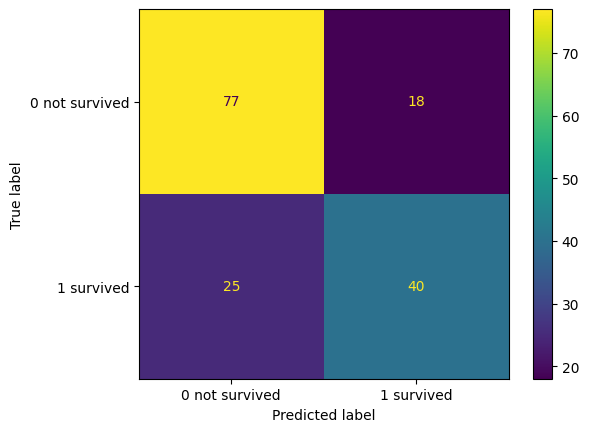

In [36]:
display_plot = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=["0 not survived","1 survived"])
display_plot.plot()
plt.show()


# **Logistic** **Regression**

In [37]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

logistic_model = linear_model.LogisticRegression(random_state=10)
logistic_model.fit(x_train, y_train)

CV3F_SVM_acc=cross_val_score(logistic_model,x_train,y_train,cv=3,scoring='accuracy')

#print reault
print('Training result')
print('Each fold ACC:',CV3F_SVM_acc)
print('Average ACC:',round((np.mean(CV3F_SVM_acc))*100,2),'+/-',round((np.std(CV3F_SVM_acc))*100,2))

Training result
Each fold ACC: [0.76886792 0.75471698 0.75471698]
Average ACC: 75.94 +/- 0.67


In [38]:
# 6.2 Show result: out-of-sample testing
# Training result
training_prediction=logistic_model.predict(x_train)
# Accuracy
training_acc=accuracy_score(y_train,training_prediction)
# f1 score
training_f1s=f1_score(y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(y_train,training_prediction)

# Testing result
testing_prediction=logistic_model.predict(x_test)
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)

# print result
print("########6.2 Show result: out-of-sample testing############")
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)
print()

########6.2 Show result: out-of-sample testing############
Training result:
Training ACC: 76.26
Training f1s: 69.98
Training pre: 73.33
Training sen: 66.92
Training spe: 82.84

Training confusion matrix:
[[309  64]
 [ 87 176]]
+-----------------------------------------+
Testing result:
Testing ACC: 68.75
Testing f1s: 60.94
Testing pre: 61.9
Testing sen: 60.0
Testing spe: 74.74

Testing confusion matrix:
[[71 24]
 [26 39]]



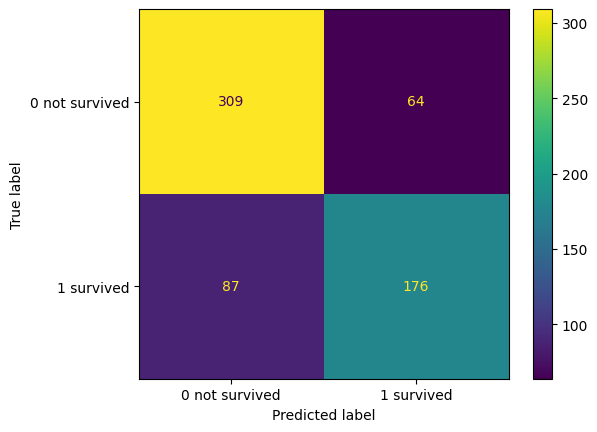

In [39]:
display_plot = ConfusionMatrixDisplay(confusion_matrix=training_cm, display_labels=["0 not survived","1 survived"])
display_plot.plot()
plt.show()

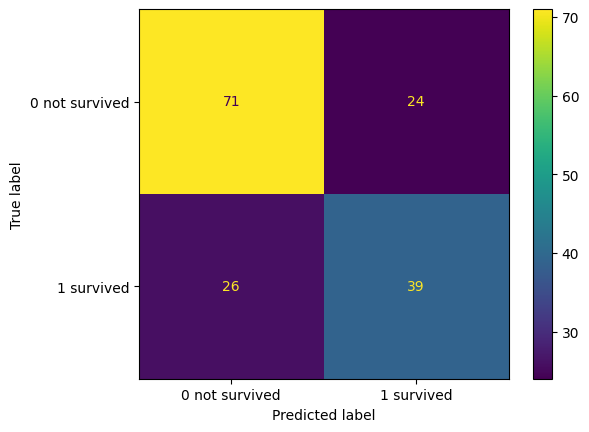

In [40]:
display_plot = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=["0 not survived","1 survived"])
display_plot.plot()
plt.show()